In [1]:
import utils

In [2]:
df = utils.read_csv('sample_searches.csv')

### Dataset information

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 16 columns):
portal_id              25200 non-null int64
searched_date          25200 non-null object
origin                 25200 non-null object
destination            25200 non-null object
departure_date         25200 non-null object
return_date            15019 non-null object
number_of_adults       25200 non-null int64
number_of_children     25200 non-null int64
number_of_seniors      25200 non-null int64
flight_class           25200 non-null int64
cheapest_total_fare    25200 non-null float64
cheapest_engine        25200 non-null int64
unique_airlines        25200 non-null object
country_code           25198 non-null object
region                 25200 non-null object
city                   25200 non-null object
dtypes: float64(1), int64(6), object(9)
memory usage: 3.1+ MB
None


#### Desription of the numerical data

In [4]:
df.describe()

,portal_id,number_of_adults,number_of_children,number_of_seniors,flight_class,cheapest_total_fare,cheapest_engine
count,25200.000000,25200.0,25200.0,25200.0,25200.000000,25200.000000,25200.000000
mean,100.241667,1.0,0.0,0.0,1.026468,740.636334,6.731865
std,25.687890,0.0,0.0,0.0,0.245386,1011.618455,8.284236
min,85.000000,1.0,0.0,0.0,1.000000,25.020000,1.000000
25%,92.000000,1.0,0.0,0.0,1.000000,218.699997,1.000000
50%,93.000000,1.0,0.0,0.0,1.000000,427.650024,9.000000
75%,95.000000,1.0,0.0,0.0,1.000000,843.469978,9.000000
max,204.000000,1.0,0.0,0.0,5.000000,9999.000000,105.000000


Columns **number_of_children, number_of_seniors, number_of_adults** have **zero std**, which means they are constans.
So, we can discard these columns.

In [5]:
df = utils.remove_columns(df, ['number_of_children', 'number_of_seniors', 'number_of_adults'])

#### Desctiption of the object data

In [6]:
df.describe(include=['O'])

,searched_date,origin,destination,departure_date,return_date,unique_airlines,country_code,region,city
count,25200,25200,25200,25200,15019,25200,25198,25200,25200
unique,14,2166,1587,341,342,16131,152,331,1228
top,2017-01-07,LIN,LAX,2017-02-03,2017-02-18,7H,-,-,-
freq,1800,14,458,615,332,318,12295,14837,14837


Some of the missing data is represented as '-' object, not NaN. So, to calculate the number of NaNs, we need to replace this object with it.

In [7]:
df = utils.replace_with_nan(df, ['-', '- '])

#### The number of NaNs in each column

In [8]:
utils.get_nan_stats(df)

portal_id: 0.00% (0/25200)
searched_date: 0.00% (0/25200)
origin: 0.00% (0/25200)
destination: 0.00% (0/25200)
departure_date: 0.00% (0/25200)
return_date: 40.40% (10181/25200)
flight_class: 0.00% (0/25200)
cheapest_total_fare: 0.00% (0/25200)
cheapest_engine: 0.00% (0/25200)
unique_airlines: 0.00% (0/25200)
country_code: 48.80% (12297/25200)
region: 58.88% (14837/25200)
city: 58.88% (14837/25200)


To figure out how important data with almost 60% missing data is let's look at the correlation between it and other features.

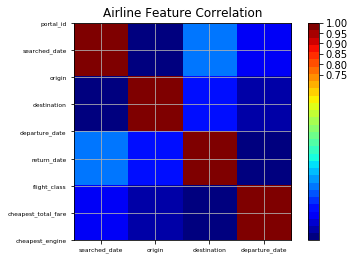

In [9]:
utils.correlation_matrix(df)

In [10]:
df = utils.remove_columns(df, ['country_code',  'region', 'city'])

### Feature extraction

For datetime we can extract the number of days had passed from the searched date to departure date. And how long the trip was. 

Also, we can extract the month and the day of week for search, depature and return date and see what we can get.

In [11]:
df = utils.extract_datetime_features(df)

df = utils.remove_columns(df, ['searched_date', 'departure_date', 'return_date'])

From unique_airlines we can extract the number of possible unique bundle of airlines. 

In [12]:
df = utils.extract_unique_airlines_features(df)

In [13]:
df.head()

,portal_id,origin,destination,flight_class,cheapest_total_fare,cheapest_engine,unique_airlines,searched_date_month,searched_date_day_of_week,departure_date_month,departure_date_day_of_week,return_date_month,return_date_day_of_week,search_dep_days,return_dep_days
0,92,ZYR,BUD,1,271.799988,9,7,1,4,3,3,3.0,5.0,76,2.0
1,92,ZYL,DAC,1,106.809998,9,1,1,4,1,2,NaN,NaN,19,NaN
2,200,ZWS,NYC,1,523.660000,9,2,1,4,1,6,5.0,1.0,16,128.0
3,92,ZWI,SAV,1,372.899994,1,2,1,4,1,1,1.0,3.0,4,9.0
4,92,ZWE,NYC,1,546.059998,1,1,1,4,3,6,4.0,1.0,79,9.0


#### Fill missing data

In [14]:
category_columns = ["portal_id", "origin", "destination", "flight_class", "cheapest_engine"]
for column in category_columns:
    df[column] = df[column].astype("category")

utils.fill_with_frequent(df, category_columns)

/home/cat/Desktop/fareportal_clustering_task (5)/fareportal_clustering_task/utils.py:43: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  df[column].fillna(df[column].value_counts().argmax(), inplace=True)


In [15]:
numerical_columns = df.select_dtypes(include=['float', 'int'])
utils.fill_with_mean(df, numerical_columns)

#### Encode object and categorical data

In [16]:
df = utils.encode_categorical(df)

In [17]:
df.head()

,cheapest_total_fare,unique_airlines,search_dep_days,return_dep_days,portal_id_85,portal_id_91,portal_id_92,portal_id_93,portal_id_95,portal_id_96,...,return_date_month_10.0,return_date_month_11.0,return_date_month_12.0,return_date_day_of_week_0.0,return_date_day_of_week_1.0,return_date_day_of_week_2.0,return_date_day_of_week_3.0,return_date_day_of_week_4.0,return_date_day_of_week_5.0,return_date_day_of_week_6.0
0,271.799988,7,76,2.000000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,106.809998,1,19,16.135695,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,523.660000,2,16,128.000000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,372.899994,2,4,9.000000,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,546.059998,1,79,9.000000,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Normalize numerical data

In [18]:
from sklearn import preprocessing
import pandas as pd
min_max_scaler = preprocessing.MinMaxScaler()
df = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns, index=df.index)

/home/cat/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
df.head()

,cheapest_total_fare,unique_airlines,search_dep_days,return_dep_days,portal_id_85,portal_id_91,portal_id_92,portal_id_93,portal_id_95,portal_id_96,...,return_date_month_10.0,return_date_month_11.0,return_date_month_12.0,return_date_day_of_week_0.0,return_date_day_of_week_1.0,return_date_day_of_week_2.0,return_date_day_of_week_3.0,return_date_day_of_week_4.0,return_date_day_of_week_5.0,return_date_day_of_week_6.0
0,0.024742,0.017045,0.228228,0.006116,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.008200,0.000000,0.057057,0.049345,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.049994,0.002841,0.048048,0.391437,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.034879,0.002841,0.012012,0.027523,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.052240,0.000000,0.237237,0.027523,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
